In [434]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, auc, RocCurveDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from joblib import dump, load

In [321]:
bank=pd.read_csv(r"C:\Users\Vithushan\Desktop\Project 7\Bank_Personal_Loan_Modelling.csv")

In [322]:
bank


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [323]:
bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [324]:
bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [325]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [326]:
bank.loc[(bank["Experience"]<0),"Experience"]=0

In [327]:
bank.loc[(bank["Experience"]<0)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [328]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [344]:
x=bank[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account']]
y=bank[['Personal Loan']]
print(x.shape)
print(y.shape)

(5000, 9)
(5000, 1)


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [346]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3000, 9)
(3000, 1)
(2000, 9)
(2000, 1)


In [347]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [379]:
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
  

TRAIN: [1000 1001 1002 ... 4997 4998 4999] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

# CategoricalNB

In [348]:
from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB()
CNB.fit(x_train, y_train)
y_pred1=CNB.predict(x_test)

C:\Users\Vithushan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [408]:
print("The accuracy of the CategoricalNB is",accuracy_score(y_test, y_pred1)*100, "%")

The accuracy of the CategoricalNB is 93.15 %


y_pred,0,1
y_initial,,
0,1768,28
1,109,95


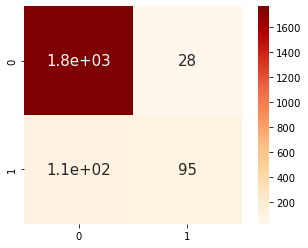

In [374]:
cm_model = confusion_matrix(y_test, y_pred1)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size':15}, square = True)
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred1
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

In [395]:
print('Recall score is equal to:')
print(recall_score(y_test,y_pred1))
print('F1 score is equal to:')
print(f1_score(y_test,y_pred1))
print('Roc_auc score is equal to:')
print(roc_auc_score(y_test,y_pred1, multi_class="ovr"))

Recall score is equal to:
0.46568627450980393
F1 score is equal to:
0.581039755351682
Roc_auc score is equal to:
0.7250480370321849


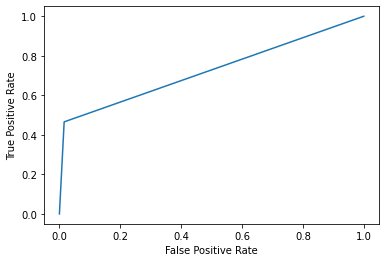

In [381]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [390]:
metrics.precision_score(y_test, y_pred1, average=None)
metrics.recall_score(y_test, y_pred1, average=None)

array([0.9844098 , 0.46568627])

In [436]:
dump(y_pred1, 'Catego.joblib')

['Catego.joblib']

In [439]:
loaded_model = load('Catego.joblib')
loaded_model

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [450]:
x3=[[34,9,180,1,8.9,3,0,0,1]]

In [440]:
x2=[[40,18,24,1,0.5,3,0,0,1]]

In [451]:
CNB.predict(x3)

C:\Users\Vithushan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# ExtraTreesClassifier

In [350]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [351]:

ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)
ETC.fit(x_train, y_train)
y_pred2=ETC.predict(x_test)

C:\Users\Vithushan\AppData\Local\Temp\ipykernel_28412\4244580156.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ETC.fit(x_train, y_train)


In [409]:
print("The accuracy of the ExtraTreesClassifier is",accuracy_score(y_test, y_pred2)*100,"%")

The accuracy of the ExtraTreesClassifier is 98.25 %


y_pred,0,1
y_initial,,
0,1794,2
1,33,171


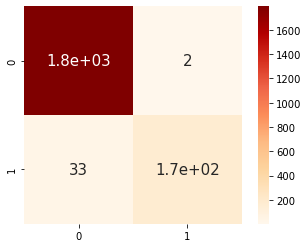

In [382]:
cm_model = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size': 15}, square = True)

x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred2
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

In [397]:
print('Recall score is equal to:')
print(recall_score(y_test,y_pred2))
print('F1 score is equal to:')
print(f1_score(y_test,y_pred2))
print('Roc_auc score is equal to:')
print(roc_auc_score(y_test,y_pred2, multi_class="ovr"))

Recall score is equal to:
0.8382352941176471
F1 score is equal to:
0.9071618037135278
Roc_auc score is equal to:
0.9185608541857724


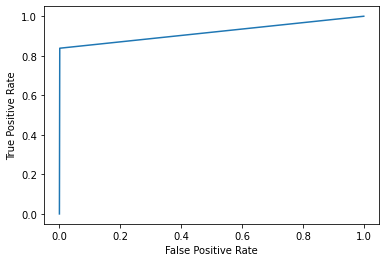

In [383]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred2)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [391]:
metrics.precision_score(y_test, y_pred2, average=None)
metrics.recall_score(y_test, y_pred2, average=None)

array([0.99888641, 0.83823529])

# LinearSVC

In [364]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
LSVC= make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
LSVC.fit(x_train, y_train)
y_pred3=LSVC.predict(x_test)

In [410]:
print("The accuracy of the LinearSVC is",accuracy_score(y_test, y_pred3)*100,"%")

The accuracy of the LinearSVC is 94.3 %


y_pred,0,1
y_initial,,
0,1778,18
1,96,108


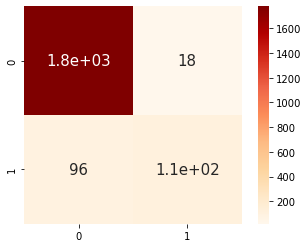

In [385]:
cm_model = confusion_matrix(y_test, y_pred3)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size': 15}, square = True)

x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred3
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

In [398]:
print('Recall score is equal to:')
print(recall_score(y_test,y_pred3))
print('F1 score is equal to:')
print(f1_score(y_test,y_pred3))
print('Roc_auc score is equal to:')
print(roc_auc_score(y_test,y_pred3, multi_class="ovr"))

Recall score is equal to:
0.5294117647058824
F1 score is equal to:
0.6545454545454545
Roc_auc score is equal to:
0.7596947464954801


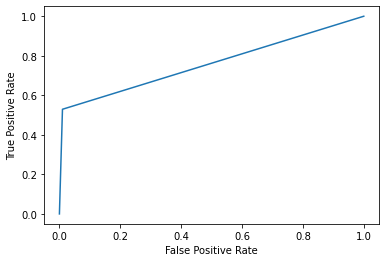

In [386]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred3)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [392]:
metrics.precision_score(y_test, y_pred3, average=None)
metrics.recall_score(y_test, y_pred3, average=None)

array([0.98997773, 0.52941176])

In [373]:
import tpot
from tpot import TPOTClassifier
print('tpot: %s' % tpot.__version__)
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

tpot: 0.11.7


In [293]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [294]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1)

In [295]:
model.fit(x_train, y_train)

C:\Users\Vithushan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=1, min_samples_split=2, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [394]:
print('Recall score is equal to:')
print(recall_score(y_test,y_pred1))
print('F1 score is equal to:')
print(f1_score(y_test,y_pred1))
print('Roc_auc score is equal to:')
print(roc_auc_score(y_test,y_pred1, multi_class="ovr"))

Recall score is equal to:
0.46568627450980393
F1 score is equal to:
0.581039755351682
Roc_auc score is equal to:
0.7250480370321849


In [ ]:
dump(final_model, 'model_name_exemple.joblib')

In [ ]:
loaded_model = load('model_name_exemple.joblib')

NameError: name 'Catego' is not defined

In [428]:
x_new=pd.DataFrame([40,18,24,1,0.5,3,0,0,1]).T
x_new.columns=x.columns
x_new

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account
0,40.0,18.0,24.0,1.0,0.5,3.0,0.0,0.0,1.0


In [429]:
print(CNB.predict(x_new))

[0]


In [430]:
print(ETC.predict(x_new))

[0]


In [431]:
print(LSVC.predict(x_new))

[0]


In [ ]:
x3=[34,9,180,1,8.9,3,0,0,1]

In [447]:
bank.loc[(bank["Personal Loan"]==1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1
